In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/datosProyecto.csv")
df

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2024,6,3994102,1010671.0,7824.51,Jueves,06/20/2024 03:30:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,6,127838,40378.0,256.00,Miércoles,06/05/2024 06:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,6,26578,11917.0,101.43,Jueves,06/20/2024 06:30:00 PM,10.18
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,6,1284196,274864.0,2241.56,Miércoles,06/12/2024 02:15:00 PM,24.00
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,6,60724,28336.0,265.63,Domingo,06/30/2024 08:00:00 PM,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,9,35746,8582.0,92.14,martes,09/24/2024 06:30:00 PM,17.22
4587,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,9,1632356,385301.0,3355.10,martes,09/24/2024 01:00:00 PM,24.00
4588,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,9,45482,12302.0,138.16,lunes,09/16/2024 12:30:00 PM,14.25
4589,99,VICHADA,99001,PUERTO CARREÑO,99001000,PUERTO CARREÑO (PUERTO CARREÑO - VICHADA),2024,9,2506803,703817.0,5147.12,jueves,09/12/2024 01:45:00 PM,24.00


In [3]:
# Como criterio, se supone que un alto valor de energía reactiva en relación de la activa
# indicaría una baja eficiencia eléctrica.
# Se obtienen las 10 columnas con mayores índices de eficiencia:
df_eficiencia = df.copy()
df_eficiencia["INDICE_EFICIENCIA"] = df["ENERGÍA ACTIVA"] / (df["ENERGÍA REACTIVA"] + 1)
eficiencia_top = df_eficiencia.sort_values(by="INDICE_EFICIENCIA", ascending=False).head(10)
eficiencia_top

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS,INDICE_EFICIENCIA
1947,44,LA GUAJIRA,44847,URIBÍA,44847012,NAZARETH (URIBÍA - LA GUAJIRA),2022,5,45811,0.0,189.74,Miércoles,05/18/2022 07:15:00 PM,12.10,45811.000000
1297,99,VICHADA,99624,SANTA ROSALÍA,99624000,SANTA ROSALÍA (SANTA ROSALÍA - VICHADA),2023,2,96580,47.0,369.70,martes,02/14/2023 08:45:00 PM,17.47,2012.083333
2424,27,CHOCÓ,27250,EL LITORAL DEL SAN JUAN,27250914,TOGOROMA PLAYA (EL LITORAL DEL SAN JUAN - CHOCÓ),2021,11,1148,19.0,9.74,viernes,11/05/2021 06:00:00 PM,4.50,57.400000
1025,27,CHOCÓ,27450,MEDIO SAN JUAN,27450016,MACEDONIA (MEDIO SAN JUAN - CHOCÓ),2023,5,161,2.0,2.87,sábado,05/27/2023 05:15:00 PM,2.03,53.666667
562,94,GUAINÍA,94001,INÍRIDA,94001966,LAGUNA COLORADA ALTA (INÍRIDA - GUAINÍA),2023,12,8604,226.0,24.38,Lunes,12/04/2023 06:30:00 PM,16.40,37.903084
1121,76,VALLE DEL CAUCA,76109,BUENAVENTURA,76109069,PAPAYAL 1 (BUENAVENTURA - VALLE DEL CAUCA),2023,4,9219,246.0,43.49,lunes,04/10/2023 07:15:00 PM,8.29,37.323887
1200,76,VALLE DEL CAUCA,76109,BUENAVENTURA,76109069,PAPAYAL 1 (BUENAVENTURA - VALLE DEL CAUCA),2023,3,11427,350.0,61.82,lunes,03/13/2023 10:15:00 PM,10.07,32.555556
922,52,NARIÑO,52390,LA TOLA,52390009,MULATOS (LA TOLA - NARIÑO),2023,7,5866,189.0,33.92,viernes,07/14/2023 08:30:00 PM,8.09,30.873684
290,94,GUAINÍA,94001,INÍRIDA,94001966,LAGUNA COLORADA ALTA (INÍRIDA - GUAINÍA),2024,1,7973,286.0,26.33,Martes,01/02/2024 06:15:00 PM,15.43,27.780488
443,44,LA GUAJIRA,44847,URIBIA,44847003,CABO DE LA VELA (URIBIA - LA GUAJIRA),2024,3,44785,1620.0,161.33,Jueves,03/28/2024 07:00:00 PM,12.35,27.628007


In [4]:
# Al obtener la desviación estándar, podremos inferir que:
# desviación estándar = servicio inconsistente / inestable

# Pero se obtienen valores erróneos en la lectura del promedio diario en horas, con valores superiores a 24 horas,
# por lo que se limpian los datos antes de aplicar la desviación
df_limpio = df[df["PROMEDIO DIARIO EN HORAS"].between(0, 24)]

# Ahora, con el dataframe limpio, podemos ver los municipios en los que el servicio puede ser impredecible o de 
# baja calidad
variabilidad = df_limpio.groupby("MUNICIPIO")["PROMEDIO DIARIO EN HORAS"].std().sort_values(ascending=False).dropna().head(10)
variabilidad

MUNICIPIO
BAJO BAUDO                11.278353
PUERTO LEGUIZAMO           9.163834
PUERTO LEGUÍZAMO           8.590376
BAJO BAUDÓ (PIZARRO)       8.186624
SAN VICENTE DEL CAGUAN     8.025662
NUQUÍ                      7.535251
MEDIO SAN JUAN             7.045898
ALTO BAUDO                 6.933119
PUERTO CARREÑO             6.746456
UNGUIA                     6.641441
Name: PROMEDIO DIARIO EN HORAS, dtype: float64

## Pruebas de relación entre columnas

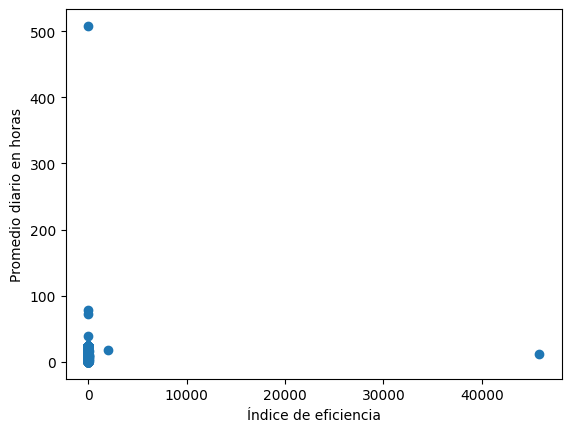

Coeficiente de Pearson: 0.0004998609058930631


In [5]:
plt.scatter(df_eficiencia["INDICE_EFICIENCIA"], df["PROMEDIO DIARIO EN HORAS"])
plt.xlabel("Índice de eficiencia")
plt.ylabel("Promedio diario en horas")
plt.show()

coeficiente = df_eficiencia["INDICE_EFICIENCIA"].corr(df["PROMEDIO DIARIO EN HORAS"])
print(f"Coeficiente de Pearson: {coeficiente}")

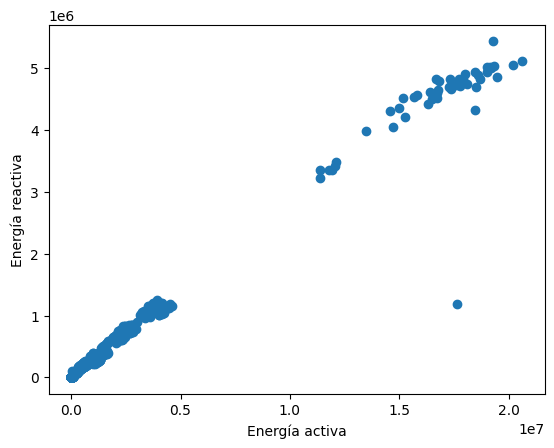

Coeficiente de Pearson: 0.9916569133264143


In [6]:
plt.scatter(df["ENERGÍA ACTIVA"], df["ENERGÍA REACTIVA"])
plt.xlabel("Energía activa")
plt.ylabel("Energía reactiva")
plt.show()

coeficiente = df["ENERGÍA ACTIVA"].corr(df["ENERGÍA REACTIVA"])
print(f"Coeficiente de Pearson: {coeficiente}")

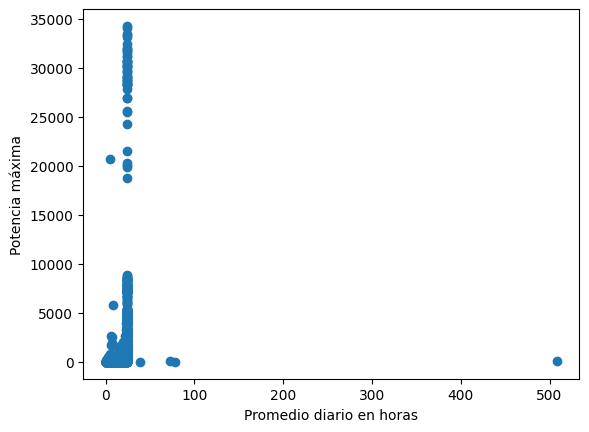

Coeficiente de Pearson: 0.22666163004985682


In [7]:
plt.scatter(df["PROMEDIO DIARIO EN HORAS"], df["POTENCIA MÁXIMA"])
plt.xlabel("Promedio diario en horas")
plt.ylabel("Potencia máxima")
plt.show()

coeficiente = df["PROMEDIO DIARIO EN HORAS"].corr(df["POTENCIA MÁXIMA"])
print(f"Coeficiente de Pearson: {coeficiente}")

## Matriz de correlación

In [8]:
df_numerico = df.select_dtypes(include='number').copy()
# Se hace drops a las columnas de id de lugares, pues no representan alguna medida útil para la matriz de correlacíon
df_numerico = df_numerico.drop(columns=["ID DEPATAMENTO", "ID LOCALIDAD", "ID MUNICIPIO"])
matriz_corr = df_numerico.corr()
matriz_corr

,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,PROMEDIO DIARIO EN HORAS
AÑO SERVICIO,1.000000,-0.010244,0.010640,-0.000285,0.009098,0.010059
MES SERVICIO,-0.010244,1.000000,-0.004728,-0.009158,-0.004634,0.014312
ENERGÍA ACTIVA,0.010640,-0.004728,1.000000,0.991657,0.997529,0.215605
ENERGÍA REACTIVA,-0.000285,-0.009158,0.991657,1.000000,0.990902,0.230594
POTENCIA MÁXIMA,0.009098,-0.004634,0.997529,0.990902,1.000000,0.226662
PROMEDIO DIARIO EN HORAS,0.010059,0.014312,0.215605,0.230594,0.226662,1.000000


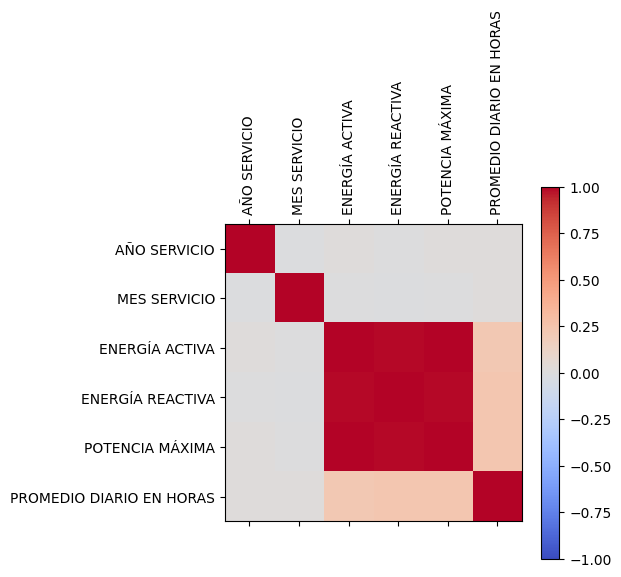

In [46]:
plt.matshow(matriz_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(6), df_numerico.columns, rotation=90)
plt.yticks(range(6), df_numerico.columns)
plt.colorbar()
plt.show()

[-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095]
